# EDA

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
pd.set_option("display.max_columns", None)

## Games data

In [82]:
all_games = pd.read_csv("data/games_clean.csv", index_col="id")

In [83]:
all_games.head()

,date,home_team_score,period,postseason,season,status,visitor_team_score,home_team.id,home_team.abbreviation,home_team.conference,home_team.division,home_team.full_name,visitor_team.id,visitor_team.abbreviation,visitor_team.conference,visitor_team.division,visitor_team.full_name
id,,,,,,,,,,,,,,,,,
47179,2019-01-30T00:00:00.000Z,126,4,False,2018,Final,94,2,BOS,East,Atlantic,Boston Celtics,4,CHA,East,Southeast,Charlotte Hornets
48751,2019-02-09T00:00:00.000Z,112,4,False,2018,Final,123,2,BOS,East,Atlantic,Boston Celtics,13,LAC,West,Pacific,LA Clippers
48739,2019-02-08T00:00:00.000Z,117,4,False,2018,Final,110,23,PHI,East,Atlantic,Philadelphia 76ers,8,DEN,West,Northwest,Denver Nuggets
48740,2019-02-08T00:00:00.000Z,119,4,False,2018,Final,106,30,WAS,East,Southeast,Washington Wizards,6,CLE,East,Central,Cleveland Cavaliers
48746,2019-02-08T00:00:00.000Z,102,4,False,2018,Final,96,26,SAC,West,Pacific,Sacramento Kings,16,MIA,East,Southeast,Miami Heat


#### Using Data from 1979 to 2020

In [84]:
all_seasons = np.sort(all_games["season"].unique())
all_seasons

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

#### Historically, The home team wins 61% of the time

In [85]:
n_home_wins = all_games[all_games["home_team_score"].gt(all_games["visitor_team_score"])].shape[0]  # number of games where home team won
n_games = all_games.shape[0]  # number of games
home_win_pct = round(n_home_wins/n_games, 2)

print(n_home_wins, n_games, home_win_pct, sep="\n")

30447
49834
0.61


In [86]:
home_win_pcts = []
for season in all_seasons:
    season_games = all_games[all_games["season"].eq(season)]
    n_home_wins = season_games[season_games["home_team_score"].gt(season_games["visitor_team_score"])].shape[0]  # number of games where home team won
    n_games = season_games.shape[0]  # number of games
    home_win_pct = round(n_home_wins/n_games, 2)
    home_win_pcts.append(home_win_pct)
    print(season, n_home_wins, n_games, home_win_pct)

1979 622 950 0.65
1980 612 995 0.62
1981 592 989 0.6
1982 612 986 0.62
1983 687 1022 0.67
1984 642 1011 0.64
1985 662 1010 0.66
1986 677 1014 0.67
1987 697 1023 0.68
1988 729 1087 0.67
1989 767 1179 0.65
1990 773 1175 0.66
1991 751 1180 0.64
1992 725 1183 0.61
1993 729 1184 0.62
1994 700 1178 0.59
1995 764 1257 0.61
1996 733 1261 0.58
1997 746 1252 0.6
1998 492 791 0.62
1999 775 1264 0.61
2000 752 1260 0.6
2001 744 1260 0.59
2002 800 1277 0.63
2003 789 1271 0.62
2004 791 1314 0.6
2005 802 1319 0.61
2006 778 1309 0.59
2007 803 1316 0.61
2008 805 1315 0.61
2009 786 1312 0.6
2010 797 1311 0.61
2011 637 1074 0.59
2012 806 1314 0.61
2013 764 1319 0.58
2014 755 1311 0.58
2015 782 1316 0.59
2016 763 1309 0.58
2017 770 1312 0.59
2018 774 1311 0.59
2019 623 1142 0.55
2020 639 1171 0.55


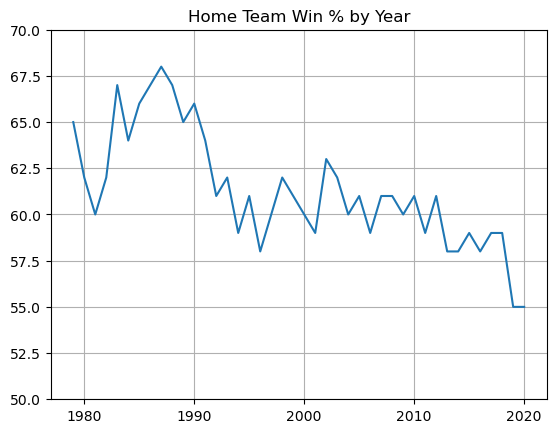

In [87]:
plt.figure()
plt.plot(all_seasons, home_win_pcts)
plt.title("Home Team Win % by Year")
plt.grid()
plt.ylim(.5, .7)
plt.yticks(ticks=plt.yticks()[0], labels=(plt.yticks()[0]*100).round(1))
plt.show()

In [13]:
# Feature engineering

g = all_games.copy()

g["date"] = pd.to_datetime(all_games["date"]).dt.tz_localize(None)

g["winner"] = np.where(g["home_team_score"] > g["visitor_team_score"], 1, 0)

home_avg_pts_map = g[["home_team.id", "home_team_score"]].groupby("home_team.id").mean().squeeze()
g["home_team_avg_score"] = g["home_team.id"].map(home_avg_pts_map)
g["home_team_avg_score"] = g["home_team_avg_score"].round(1)

visitor_avg_pts_map = g[["visitor_team.id", "visitor_team_score"]].groupby("visitor_team.id").mean().squeeze()
g["visitor_team_avg_score"] = g["visitor_team.id"].map(visitor_avg_pts_map)
g["visitor_team_avg_score"] = g["visitor_team_avg_score"].round(1)

#### Furthermore, teams score more points when they are playing at home

In [24]:
print(g["home_team_avg_score"].gt(g["visitor_team_avg_score"]).value_counts())
print(round(43173 / 50460, 2))

True     43172
False     6748
dtype: int64
0.86


In [17]:
g["home_team_avg_score"]

id
47179     105.7
48751     105.7
48739     103.2
48740     103.4
48746     105.5
          ...  
128052    102.2
128036    101.8
128001    103.2
127942    100.9
127688    101.7
Name: home_team_avg_score, Length: 49920, dtype: float64

In [18]:
g["visitor_team_avg_score"]

id
47179      98.1
48751     100.6
48739     104.2
48740      98.2
48746      96.0
          ...  
128052    100.1
128036    101.5
128001    101.5
127942     99.6
127688     99.4
Name: visitor_team_avg_score, Length: 49920, dtype: float64